In [2]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


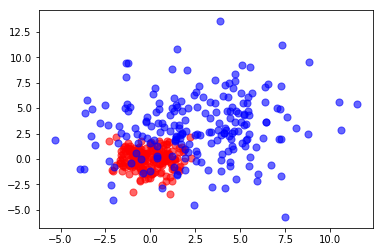

In [3]:
n = 200
a = np.random.normal(loc=0, scale=1, size=(n, 2))
b = np.random.normal(loc=3, scale=3, size=(n, 2))
pl.scatter(a[:, 0], a[:, 1], c='red', s=50, alpha=0.6)
pl.scatter(b[:, 0], b[:, 1], c='blue', s=50, alpha=0.6)


In [4]:
X = np.vstack([a, b])
print(X.shape)
y = np.hstack([np.zeros(n), np.ones(n)])
print(y.shape)

[[ 9.59025151e-01  9.00478154e-01]
 [-6.40528599e-01 -1.06053537e-01]
 [ 1.65653329e+00 -7.00174520e-01]
 [-5.72124539e-01 -9.06117684e-01]
 [ 9.93570418e-02 -1.44401595e+00]
 [ 1.60443416e+00 -7.75313672e-01]
 [ 1.08539292e+00 -3.39326497e-01]
 [-4.73076510e-01 -9.95925665e-02]
 [ 2.19572413e-01 -1.34773014e-01]
 [ 8.46165597e-01 -1.28207435e-01]
 [ 1.33993211e+00 -1.13687905e+00]
 [-1.49444774e+00 -4.22969994e-02]
 [ 1.86390135e+00  8.91748382e-01]
 [ 1.36813131e+00 -1.42195247e-01]
 [-2.95037499e-01 -1.44887670e+00]
 [-1.04257789e+00  4.21615872e-01]
 [-1.40223237e+00 -8.44018069e-01]
 [-1.53930363e-01  5.38852651e-01]
 [ 1.02554742e+00  5.01967426e-01]
 [-1.12553676e+00 -7.39398974e-01]
 [ 5.74376202e-01 -4.31405177e-02]
 [-1.48187752e+00 -4.28034163e-01]
 [ 6.95218412e-01  1.18542357e-01]
 [-6.40792299e-01 -1.12276201e-02]
 [-7.16148837e-01 -1.25567425e-02]
 [ 8.88402407e-01 -1.15196125e-01]
 [-5.60835342e-01  7.80426754e-01]
 [-5.70550735e-01  7.15486299e-01]
 [-6.82343801e-01  7

(500, 2)


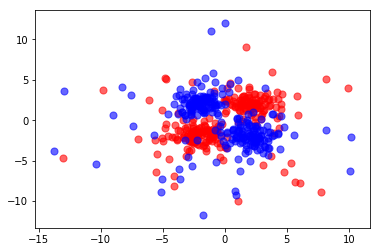

In [4]:
n = 100
a = np.random.normal(loc=-2, scale=1, size=(n*4,1))
b = np.random.normal(loc=2, scale=1, size=(n*4,1))
c = 5*np.random.randn(100,2)
#print np.hstack([a[:n],a[n:2*n]]).shape
X = np.vstack(
    [np.hstack([a[:n],a[n:2*n]]),np.hstack([b[:n],b[n:2*n]]),c,np.hstack([a[2*n:3*n],b[2*n:3*n]]),np.hstack([b[3*n:],a[3*n:]])])
print(X.shape)
y = np.hstack([np.zeros(2*n+50), np.ones(2*n+50)])
pl.scatter(X[:2*n+50, 0], X[:2*n+50, 1], c='red', s=50, alpha=0.6)
pl.scatter(X[2*n+50:, 0], X[2*n+50:, 1], c='blue', s=50, alpha=0.6)

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(n_neighbors=5)
clf.fit(X, y)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [7]:
clf.predict([
             [1, 1],
             [0.5, 0.5],
             [-10, -20]
             ])

array([0., 0., 1.])

In [8]:
clf.predict_proba([
                   [1, 1],
                   [0.5, 0.5],
                   [-10, -20]
                   ])

array([[1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6]])

In [7]:
def get_grid(data, border=1., step=.05):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

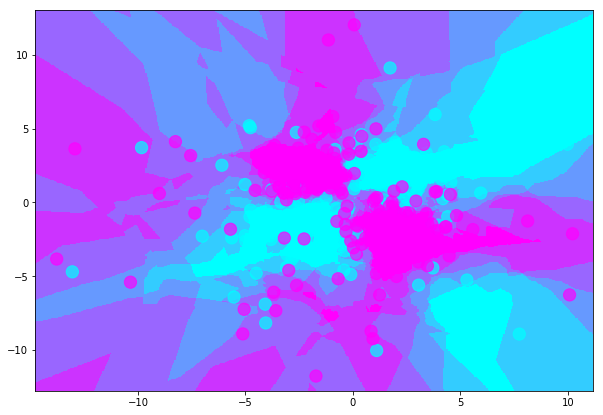

In [8]:
xx, yy = get_grid(X)
X_in=np.hstack((np.reshape(xx,(size(xx),1)), np.reshape(yy,(size(yy),1))))
#X_in=np.c_[xx.ravel(), yy.ravel()]
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', alpha=0.7)

In [11]:
def plot_model(X, y, clf):
    clf.fit(X, y)
    xx, yy = get_grid(X)
    predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    pl.figure(figsize=(10, 7))
    pl.pcolormesh(xx, yy, predicted, cmap='winter')
    pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='winter', alpha=0.7)

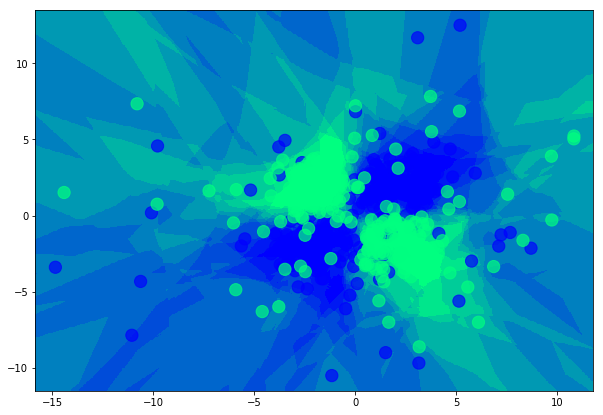

In [12]:
plot_model(X, y, KNN(n_neighbors=10))

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 2)
(150, 2)
(350,)
(150,)


c:\users\илья\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, KNN(n_neighbors=10).fit(X_train, y_train).predict(X_test))

0.8933333333333333

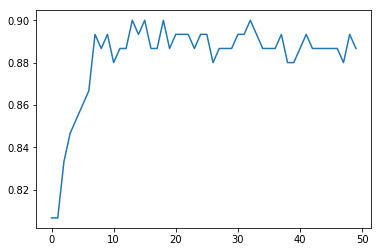

In [16]:
scores = []
for k in range(1, 51):
    scores.append(accuracy_score(y_test, KNN(n_neighbors=k).fit(X_train, y_train).predict(X_test)))
pl.plot(scores)

In [22]:
from sklearn.grid_search import GridSearchCV
params = {'n_neighbors': list(range(1, 101))}
grid_searcher = GridSearchCV(clf, params, cv=20)
grid_searcher.fit(X, y)

GridSearchCV(cv=20, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [23]:
means = []
stds = []
for elem in grid_searcher.grid_scores_:
    means.append(np.mean(elem.cv_validation_scores))
    stds.append(sqrt(np.var(elem.cv_validation_scores)))
means = np.array(means)
stds = np.array(stds)

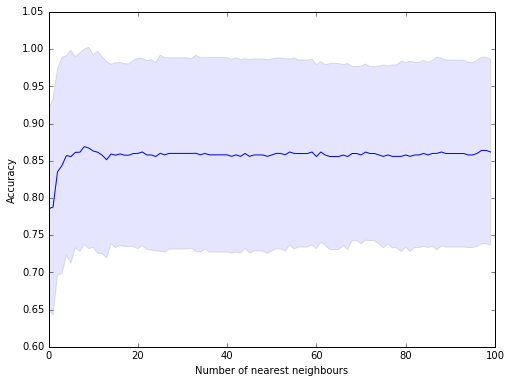

In [23]:
pl.figure(figsize=(8, 6))
pl.plot(means)
pl.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.1, facecolor='blue')
pl.xlabel('Number of nearest neighbours')
pl.ylabel('Accuracy')